
#  BigQuery SQL commands

This is a practice of some basic SQL commands and functions on bigquery with python

In [1]:
# set google service account creddential for using bigquery

#import os

#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "C:/Users/---/---.json"

In [1]:
import humanize  # for displaying human friendly size of dataset in dry run.

In [2]:
from google.cloud import bigquery

In [3]:
# Create a "Client" object
client = bigquery.Client()

<h2 id="Example-1:-exploring-dataset-and-tables">Example 1: exploring dataset and tables</h2>

<p>dataset: census_bureau_international</p>

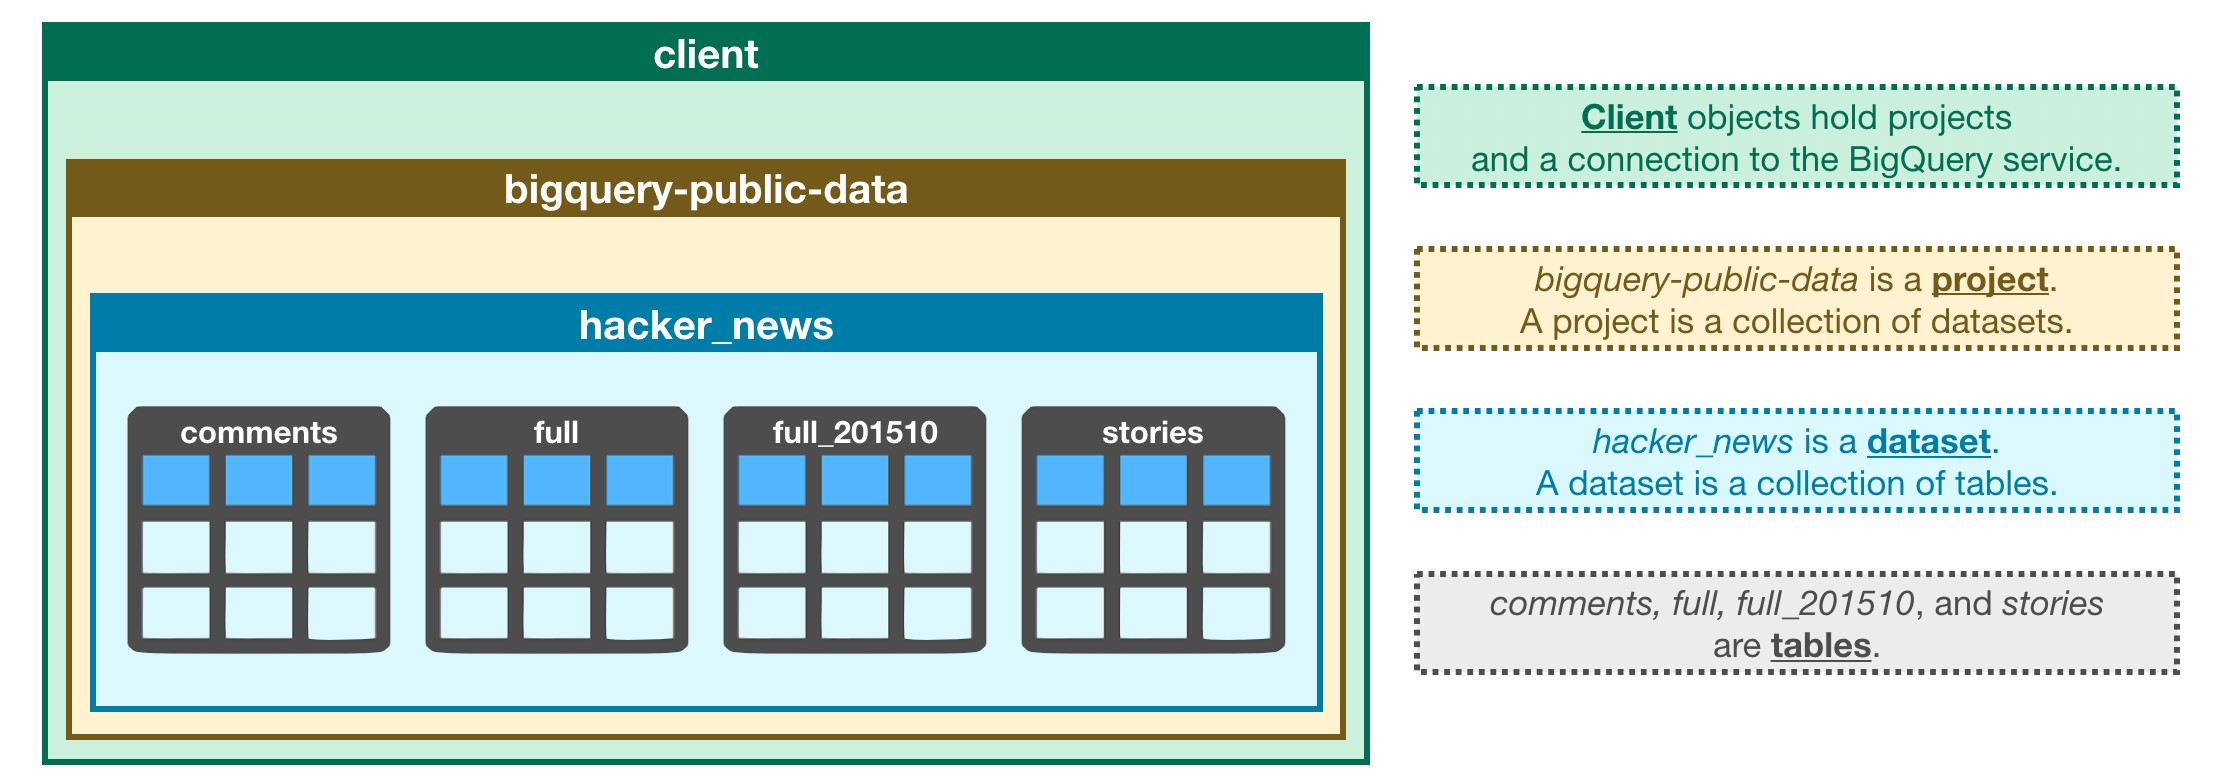

In [4]:
# Construct a reference to the dataset
dataset_ref = client.dataset("census_bureau_international", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [5]:
# List all the tables in the dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

age_specific_fertility_rates
birth_death_growth_rates
country_names_area
midyear_population
midyear_population_5yr_age_sex
midyear_population_age_sex
midyear_population_agespecific
mortality_life_expectancy


In [6]:
len(tables)

8

In [7]:
# Construct a reference to the "..." table
table_ref = dataset_ref.table("mortality_life_expectancy")

# API request - fetch the table
table = client.get_table(table_ref)

In [8]:
# Print information on all the columns in the "full" table in the "hacker_news" dataset
table.schema

[SchemaField('country_code', 'STRING', 'REQUIRED', 'Federal Information Processing Standard (FIPS) country/area code', ()),
 SchemaField('country_name', 'STRING', 'NULLABLE', 'Country or area name', ()),
 SchemaField('year', 'INTEGER', 'REQUIRED', 'Year', ()),
 SchemaField('infant_mortality', 'FLOAT', 'NULLABLE', 'Both sexes infant mortality rate (infant deaths per 1,000 population)', ()),
 SchemaField('infant_mortality_male', 'FLOAT', 'NULLABLE', 'Male infant mortality rate (infant deaths per 1,000 population)', ()),
 SchemaField('infant_mortality_female', 'FLOAT', 'NULLABLE', 'Female infant mortality rate (infant deaths per 1,000 population)', ()),
 SchemaField('life_expectancy', 'FLOAT', 'NULLABLE', 'Both sexes life expectancy at birth (years)', ()),
 SchemaField('life_expectancy_male', 'FLOAT', 'NULLABLE', 'Male life expectancy at birth (years)', ()),
 SchemaField('life_expectancy_female', 'FLOAT', 'NULLABLE', 'Female life expectancy at birth (years)', ()),
 SchemaField('mortality_

In [9]:
# Preview the first five lines of the table
client.list_rows(table, max_results=5).to_dataframe()

,country_code,country_name,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,mortality_rate_1to4,mortality_rate_1to4_male,mortality_rate_1to4_female
0,AA,Aruba,1981,23.30,26.09,20.56,72.86,69.09,76.56,26.05,29.25,22.91,2.82,3.24,2.40
1,AA,Aruba,1982,23.04,26.10,20.05,72.88,69.14,76.55,25.79,29.31,22.36,2.82,3.30,2.36
2,AA,Aruba,1983,22.79,26.10,19.55,72.90,69.19,76.53,25.56,29.37,21.83,2.83,3.36,2.33
3,AA,Aruba,1984,22.55,26.10,19.06,72.91,69.24,76.51,25.34,29.44,21.31,2.85,3.43,2.29
4,AA,Aruba,1985,22.31,26.10,18.58,72.92,69.29,76.49,25.12,29.51,20.80,2.87,3.50,2.26


In [10]:
# Preview the first five entries in the column of the table
client.list_rows(table, selected_fields=table.schema[:1], max_results=5).to_dataframe()

,country_code
0,AA
1,AA
2,AA
3,AA
4,AA


In [14]:
table = client.get_table(dataset_ref.table("country_names_area"))

In [15]:
table.schema

[SchemaField('country_code', 'STRING', 'REQUIRED', 'Federal Information Processing Standard (FIPS) country/area code', ()),
 SchemaField('country_name', 'STRING', 'NULLABLE', 'Country or area name', ()),
 SchemaField('country_area', 'FLOAT', 'NULLABLE', 'Area in square kilometers', ())]

## Example 2: some basic commands

SELECT FROM, WHERE, ORDER BY, LIMIT

INNER JOIN

In [11]:
query = """
#standardSQL
SELECT
  age.country_name,
  age.life_expectancy,
  size.country_area
FROM (
  SELECT
    country_name,
    life_expectancy
  FROM
    `bigquery-public-data.census_bureau_international.mortality_life_expectancy`
  WHERE
    year = 2016) age
INNER JOIN (
  SELECT
    country_name,
    country_area
  FROM
    `bigquery-public-data.census_bureau_international.country_names_area` where country_area > 25000) size
ON
  age.country_name = size.country_name
ORDER BY
  2 DESC
/* Limit removed for Data Studio Visualization */
LIMIT
  100
  """

In [12]:
df = client.query(query).result().to_dataframe()

In [13]:
df.head(20)

,country_name,life_expectancy,country_area
0,Japan,85.00,364485.0
1,Iceland,83.02,100250.0
2,Switzerland,82.57,39997.0
3,"Korea, South",82.43,96920.0
4,Australia,82.23,7682300.0
5,Italy,82.20,294140.0
6,Sweden,82.06,410335.0
7,Canada,81.85,9093507.0
8,France,81.84,640427.0
9,Norway,81.78,304282.0


## Example 3:  more commands

dataset: usa_name 

GROUP BY, HAVING

MAX, MIN, SUM, COALESCE, RANK OVER

BETWEEN AND

WITH ... AS



In [16]:
# Construct a reference to the dataset
dataset_ref = client.dataset("usa_names", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [17]:
# List all the tables in the dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

usa_1910_2013
usa_1910_current


In [18]:
len(tables)

2

In [19]:
# Construct a reference to the "..." table
table_ref = dataset_ref.table("usa_1910_current")

# API request - fetch the table
table = client.get_table(table_ref)

In [20]:
# Print information on all the columns in the "full" table in the "hacker_news" dataset
table.schema

[SchemaField('state', 'STRING', 'NULLABLE', '2-digit state code', ()),
 SchemaField('gender', 'STRING', 'NULLABLE', 'Sex (M=male or F=female)', ()),
 SchemaField('year', 'INTEGER', 'NULLABLE', '4-digit year of birth', ()),
 SchemaField('name', 'STRING', 'NULLABLE', 'Given name of a person at birth', ()),
 SchemaField('number', 'INTEGER', 'NULLABLE', 'Number of occurrences of the name', ())]

In [21]:
client.list_rows(table, max_results=5).to_dataframe()

,state,gender,year,name,number
0,OH,F,1910,Mary,1099
1,OH,F,1910,Helen,698
2,OH,F,1910,Dorothy,487
3,OH,F,1910,Ruth,457
4,OH,F,1910,Margaret,452


### check current year

In [22]:
query1 = """
#standardSQL
SELECT
  MIN(names.year) AS first_year,
  MAX(names.year) AS current_year 
FROM
  `bigquery-public-data.usa_names.usa_1910_current` AS names 


  """

In [23]:
client.query(query1).result().to_dataframe()

,first_year,current_year
0,1910,2018


### popular Male name in 21st century

but only show those have more than 300,000 count

In [51]:
query2 = """
#standardSQL
SELECT
  names.name AS name,
    COALESCE(SUM(names .number),
    0) AS count
FROM
  `bigquery-public-data.usa_names.usa_1910_current` AS names 
WHERE
  names.gender = 'M' AND  names.year > 1999
GROUP BY
  1
HAVING SUM(names.number) > 300000
ORDER BY
  2 DESC
LIMIT
  100
  """

### dry run for estimate data size

In [52]:
# Create a QueryJobConfig object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query2, job_config=dry_run_config)

print("This query will process {} bytes.".format(humanize.naturalsize(dry_run_query_job.total_bytes_processed)))

This query will process 162.0 MB bytes.


In [53]:
df2 = client.query(query2).result().to_dataframe()

In [54]:
df2.head(20)

,name,count
0,Jacob,425864
1,Michael,384597
2,William,340194
3,Ethan,339287
4,Matthew,336999
5,Joshua,331153
6,Daniel,326682
7,Alexander,309239
8,Noah,307073
9,Joseph,300849


### popular female name in the 90s

In [28]:
query3 = """
#standardSQL
SELECT
  names.name AS name,
  COALESCE(SUM(names.number), 0) AS count
FROM
  `bigquery-public-data.usa_names.usa_1910_current` AS names 
WHERE
  names.gender = 'F' AND  names.year BETWEEN 1990 AND 1999
GROUP BY
  1
ORDER BY
  2 DESC
LIMIT
  100
  """

In [29]:
df3 = client.query(query3).result().to_dataframe()

In [30]:
df3.head(20)

,name,count
0,Jessica,303094
1,Ashley,301803
2,Emily,237232
3,Sarah,224338
4,Samantha,224000
5,Amanda,191088
6,Brittany,190812
7,Elizabeth,172645
8,Taylor,169016
9,Megan,160356


<h3 id="List-top-3-most-popular-names-of-each-state">List top 3 most popular names of 21st century of each state</h3>

<ol>
	<li>group by state and name</li>
	<li>rank the count in each state</li>
	<li>keep the top 3 of each state</li>
</ol>


In [46]:
query4 = """
#standardSQL


WITH name_state_rank AS(
SELECT
  state,
  name,
  COALESCE(SUM(number), 0)  AS name_count,
  RANK() OVER (
            PARTITION BY state
            ORDER BY COALESCE(SUM(number), 0) DESC) AS ranking

FROM
  `bigquery-public-data.usa_names.usa_1910_current` 
WHERE
  gender = 'M' AND  year > 1999
GROUP BY
  1,2
HAVING SUM(number) >500
ORDER BY
  1 ASC, 3 DESC
)

SELECT * 
FROM name_state_rank
WHERE ranking < 4


LIMIT
  200
  """

In [47]:
# Create a QueryJobConfig object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query4, job_config=dry_run_config)

print("This query will process {} bytes.".format(humanize.naturalsize(dry_run_query_job.total_bytes_processed)))

This query will process 186.1 MB bytes.


In [48]:
df4 = client.query(query4).result().to_dataframe()

In [49]:
df4.head(20)

,state,name,name_count,ranking
0,AK,James,948,1
1,AK,Michael,913,2
2,AK,Jacob,910,3
3,AL,William,9762,1
4,AL,James,6937,2
5,AL,John,6534,3
6,AR,William,4084,1
7,AR,Jacob,3832,2
8,AR,Ethan,3289,3
9,AZ,Jacob,9183,1


<h2 id="Reference">Reference</h2>


<ul>
	<li>Kaggle SQL lessons&nbsp;<a href="https://www.kaggle.com/learn/intro-to-sql">https://www.kaggle.com/learn/intro-to-sql</a></li>
	<li>w3schools SQL tutorial&nbsp;<a href="https://www.w3schools.com/sql/default.asp">https://www.w3schools.com/sql/default.asp</a></li>
</ul>

<p>&nbsp;</p>
